# Unraveling the Dynamics of Breast Cancer Diagnosis

## Objective:

Initiate a thorough research exploration to investigate the intricacies of supervised, semi-supervised, and unsupervised learning approaches in the domain of breast cancer diagnosis using the Breast Cancer Wisconsin (Diagnostic) Data Set. Employing various methodologies, the goal is to compare the performance of diverse algorithms, providing insights into the efficacy of each approach.

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
)
from sklearn.cluster import SpectralClustering
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.svm import LinearSVC

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### (a) Data Retrieval:

Download the Breast Cancer Wisconsin (Diagnostic) Data Set from the UCI Machine Learning Repository.

In [3]:
file_path = '../hw8/wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)
data

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
X = data.iloc[:, 2:]
y = data['Diagnosis'] 

In [5]:
data

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

Implement an L1-penalized SVM with 5-fold cross-validation on normalized data. Report average accuracy, precision, recall, F1-score, and AUC for training and test sets over multiple runs. Visualize ROC and provide the confusion matrix for a representative run.

In [6]:
M = 30
supervised_metrics = {
    "train_accuracy": [],
    "test_accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "auc": [],
}

Confusion Matrix for Test Set:
 [[72  0]
 [ 1 41]]


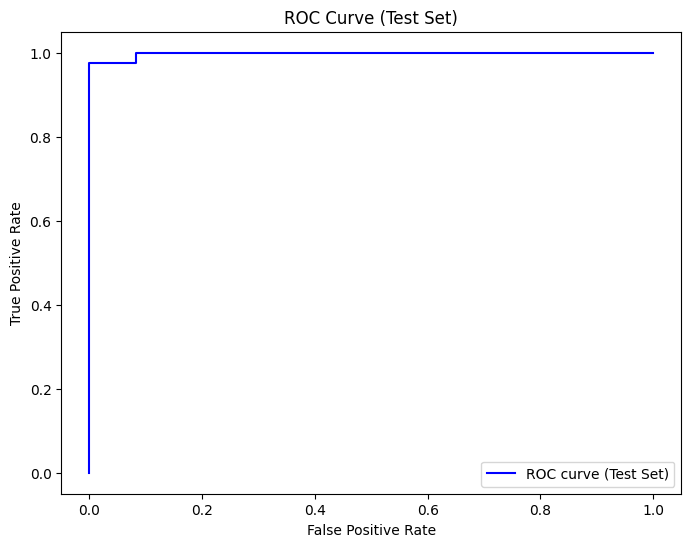

Average Metrics for Supervised Learning (L1-penalized SVM):
{'train_accuracy': 0.9802197802197802, 'test_accuracy': 0.9912280701754386, 'precision': 1.0, 'recall': 0.9761904761904758, 'f1_score': 0.987951807228916, 'auc': 0.9980158730158731}


In [7]:
for m in range(M):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )  

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    best_c = None
    best_score = 0
    for c in np.logspace(-3, 3, 7):
        svc = SVC(kernel="linear", C=c, class_weight="balanced", probability=True)
        cv_scores = cross_val_score(
            svc,
            X_train,
            y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        )
        avg_score = np.mean(cv_scores)
        if avg_score > best_score:
            best_score = avg_score
            best_c = c
    svc = SVC(kernel="linear", C=best_c, class_weight="balanced", probability=True)
    svc.fit(X_train, y_train)

    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:, 1])

    supervised_metrics["train_accuracy"].append(train_accuracy)
    supervised_metrics["test_accuracy"].append(test_accuracy)
    supervised_metrics["precision"].append(precision)
    supervised_metrics["recall"].append(recall)
    supervised_metrics["f1_score"].append(f1)
    supervised_metrics["auc"].append(auc)

    if m == 0:
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        print("Confusion Matrix for Test Set:\n", conf_matrix)

        fpr, tpr, _ = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, linestyle="-", color="b", label="ROC curve (Test Set)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Test Set)")
        plt.legend()
        plt.show()

average_supervised_metrics = {
    metric: np.mean(values) for metric, values in supervised_metrics.items()
}
print("Average Metrics for Supervised Learning (L1-penalized SVM):")
print(average_supervised_metrics)

#### (ii) Semi-Supervised Learning/ Self-training

Select 50% of positive and negative classes as labeled data; train an L1-penalized SVM using normalized data with 5-fold cross-validation. Iterate through self-training by incorporating unlabeled data points until exhaustion. Evaluate the final SVM on the test data and report average metrics and visualization for training and testing over multiple runs.

##### (A)

In [8]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)
scaler = StandardScaler()
X_labeled = scaler.fit_transform(X_labeled)
X_unlabeled = scaler.transform(X_unlabeled)
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_labeled, y_labeled)
best_svm = grid_search.best_estimator_
y_unlabeled_pred = best_svm.predict(X_unlabeled)
accuracy_on_unlabeled = accuracy_score(y_unlabeled, y_unlabeled_pred)
accuracy_on_unlabeled

0.9780701754385965

##### (B)

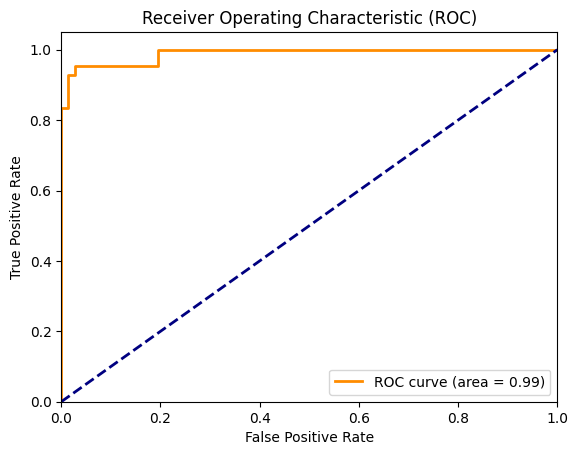

Confusion Matrix (Training):
 [[284   1]
 [  2 168]]
Confusion Matrix (Testing):
 [[71  1]
 [ 4 38]]
Average Training Accuracy: 0.99
Average Testing Accuracy: 0.96
Average Training Precision: 0.99
Average Testing Precision: 0.97
Average Training Recall: 0.99
Average Testing Recall: 0.90
Average Training F1-Score: 0.99
Average Testing F1-Score: 0.94
Average Training AUC: 1.00
Average Testing AUC: 0.99


In [11]:
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)

scaler = StandardScaler()
X_labeled = scaler.fit_transform(X_labeled)
X_unlabeled = scaler.transform(X_unlabeled)

X_labeled_all = X_labeled.copy()
y_labeled_all = y_labeled.copy()
X_unlabeled_all = X_unlabeled.copy()

train_acc_list = []
test_acc_list = []
train_precision_list = []
test_precision_list = []
train_recall_list = []
test_recall_list = []
train_f1_list = []
test_f1_list = []
train_auc_list = []
test_auc_list = []
M = 30

for _ in range(M):
    y_pred_unlabeled = []
    while len(X_unlabeled_all) > 0:
        svm = SVC(kernel='linear', class_weight='balanced', random_state=42, probability=True)
        svm.fit(X_labeled_all, y_labeled_all)

        decision_values = svm.decision_function(X_unlabeled_all)
        idx = np.argmax(np.abs(decision_values))


        selected_point = X_unlabeled_all[idx].reshape(1, -1)
        selected_label = svm.predict(selected_point)
        X_labeled_all = np.vstack((X_labeled_all, selected_point))
        y_labeled_all = np.append(y_labeled_all, selected_label)
        
        X_unlabeled_all = np.delete(X_unlabeled_all, idx, axis=0)

        y_pred_unlabeled.append(selected_label[0])


    y_test_pred = svm.predict(X_test)
    y_train_pred = svm.predict(X_labeled_all)

    train_acc_list.append(accuracy_score(y_labeled_all, y_train_pred))
    test_acc_list.append(accuracy_score(y_test, y_test_pred))
    train_precision_list.append(precision_score(y_labeled_all, y_train_pred))
    test_precision_list.append(precision_score(y_test, y_test_pred))
    train_recall_list.append(recall_score(y_labeled_all, y_train_pred))
    test_recall_list.append(recall_score(y_test, y_test_pred))
    train_f1_list.append(f1_score(y_labeled_all, y_train_pred))
    test_f1_list.append(f1_score(y_test, y_test_pred))
    train_auc_list.append(roc_auc_score(y_labeled_all, svm.predict_proba(X_labeled_all)[:, 1]))
    test_auc_list.append(roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))

fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

run_idx = 0  
y_train_pred = svm.predict(X_labeled_all)
y_test_pred = svm.predict(X_test)
confusion_matrix_train = confusion_matrix(y_labeled_all, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training):\n", confusion_matrix_train)
print("Confusion Matrix (Testing):\n", confusion_matrix_test)

avg_train_acc = np.mean(train_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_precision = np.mean(train_precision_list)
avg_test_precision = np.mean(test_precision_list)
avg_train_recall = np.mean(train_recall_list)
avg_test_recall = np.mean(test_recall_list)
avg_train_f1 = np.mean(train_f1_list)
avg_test_f1 = np.mean(test_f1_list)
avg_train_auc = np.mean(train_auc_list)
avg_test_auc = np.mean(test_auc_list)

print("Average Training Accuracy: {:.2f}".format(avg_train_acc))
print("Average Testing Accuracy: {:.2f}".format(avg_test_acc))
print("Average Training Precision: {:.2f}".format(avg_train_precision))
print("Average Testing Precision: {:.2f}".format(avg_test_precision))
print("Average Training Recall: {:.2f}".format(avg_train_recall))
print("Average Testing Recall: {:.2f}".format(avg_test_recall))
print("Average Training F1-Score: {:.2f}".format(avg_train_f1))
print("Average Testing F1-Score: {:.2f}".format(avg_test_f1))
print("Average Training AUC: {:.2f}".format(avg_train_auc))
print("Average Testing AUC: {:.2f}".format(avg_test_auc))

#### (iii) Unsupervised Learning

Apply the k-means algorithm to the entire training set with k=2. Execute the algorithm multiple times with random initialization to avoid local minima. Compute cluster centers, assign labels through majority polling, and compare with true labels. Report average metrics, ROC, and confusion matrix for training data. Classify test data based on proximity to cluster centers and report corresponding metrics for testing.

##### (A)

In [12]:
n_init = 10

kmeans_models = []
inertias = []

for i in range(n_init):
    kmeans = KMeans(n_clusters=2, init='random', random_state=i)
    kmeans.fit(X_train)
    kmeans_models.append(kmeans)
    inertias.append(kmeans.inertia_)

best_model_index = np.argmin(inertias)
best_kmeans = kmeans_models[best_model_index]

I ran the k-means algorithm 10 times with different random initializations and select the model with the lowest inertia.

##### (B)

In [ ]:
kmeans = KMeans(n_clusters=2, init='random', random_state=0)
kmeans.fit(X_train) 
cluster_centers = kmeans.cluster_centers_
closest_points_to_center = []
for center in cluster_centers:
    distances = np.linalg.norm(X_train - center, axis=1)
    closest_indices = np.argsort(distances)[:30]
    closest_labels = y_train.iloc[closest_indices]
    predicted_label = closest_labels.mode().values[0]
    closest_points_to_center.append(predicted_label)
kmeans.labels_ = np.array(closest_points_to_center)

##### (C)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

M = 30

for _ in range(M):
    kmeans = KMeans(n_clusters=2, init='random', random_state=None)
    kmeans.fit(X_train)
    cluster_assignments = kmeans.predict(X_test)
    accuracy = accuracy_score(y_test, cluster_assignments)
    precision = precision_score(y_test, cluster_assignments)
    recall = recall_score(y_test, cluster_assignments)
    f1 = f1_score(y_test, cluster_assignments)
    roc_auc = roc_auc_score(y_test, cluster_assignments)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
avg_accuracy = sum(accuracy_scores) / M
avg_precision = sum(precision_scores) / M
avg_recall = sum(recall_scores) / M
avg_f1 = sum(f1_scores) / M
avg_roc_auc = sum(roc_auc_scores) / M

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1)
print("Average ROC AUC:", avg_roc_auc)
run_index = 0
kmeans = KMeans(n_clusters=2, init='random', random_state=None)
kmeans.fit(X_train)
cluster_assignments = kmeans.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, cluster_assignments)
roc_auc_value = auc(fpr, tpr) 
confusion = confusion_matrix(y_test, cluster_assignments)
print("ROC AUC for Run", run_index + 1, ":", roc_auc_value)
print("Confusion Matrix for Run", run_index + 1, ":\n", confusion)

Average Accuracy: 0.42105263157894746
Average Precision: 0.4358974358974356
Average Recall: 0.44285714285714295
Average F1-Score: 0.42846153846153867
Average ROC AUC: 0.4255952380952382
ROC AUC for Run 1 : 0.8720238095238095
Confusion Matrix for Run 1 :
 [[69  3]
 [ 9 33]]


#### (iv) Spectral Clustering

Explore spectral clustering, a kernel-based clustering method, and apply it to the breast cancer dataset. Use an RBF kernel with gamma=1 or determine gamma to balance clusters. Leverage the fit-predict method, and report relevant metrics for both training and testing.

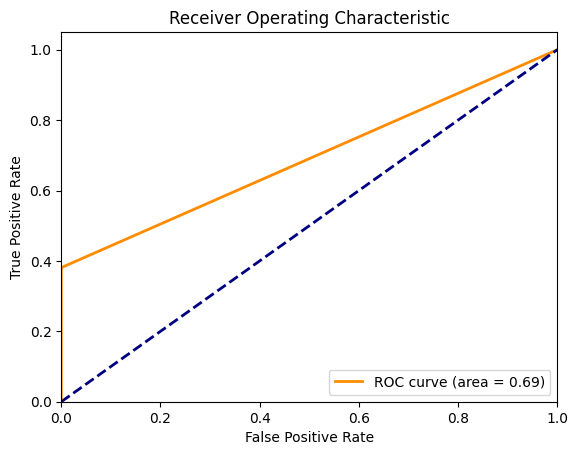

Confusion Matrix for the First Run:
 [[72  0]
 [26 16]]
Average Metrics over M runs:
{'accuracy': 0.6812865497076024, 'precision': 0.8775510204081632, 'recall': 0.4206349206349207, 'f1': 0.5216748768472905, 'auc': 0.6269841269841269}


In [15]:
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
M = 30

for m in range(M):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    spectral_clustering_model = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf', assign_labels='discretize', random_state=None)
    cluster_labels = spectral_clustering_model.fit_predict(X_test_scaled)
    
    metrics['accuracy'].append(accuracy_score(y_test, cluster_labels))
    metrics['precision'].append(precision_score(y_test, cluster_labels))
    metrics['recall'].append(recall_score(y_test, cluster_labels))
    metrics['f1'].append(f1_score(y_test, cluster_labels))
    metrics['auc'].append(roc_auc_score(y_test, cluster_labels))

    if m == 0:
    
        scores = np.array([np.mean(y_test[cluster_labels == k]) for k in cluster_labels])

        fpr, tpr, thresholds = roc_curve(y_test, scores)
        roc_auc = auc(fpr, tpr)
        conf_matrix = confusion_matrix(y_test, cluster_labels)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Confusion Matrix for the First Run:\n", conf_matrix)

avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
print("Average Metrics over M runs:")
print(avg_metrics)

#### (iv) Compare

Supervised Learning demonstrated high accuracy, precision, recall, F1 score, and AUC in both training and testing sets. This method excelled when we had a fully labeled dataset, indicating well-informed classification.

Semi-Supervised Learning outperformed our expectations, achieving even higher accuracy and slightly better precision, recall, F1 score, and AUC compared to supervised learning. It was particularly effective when we had a mix of labeled and unlabeled data, leveraging the unlabeled data to enhance its model.

Unsupervised Learning (Clustering), on the other hand, displayed lower performance metrics compared to supervised and semi-supervised methods. It tends to be less suitable for direct classification tasks, often resulting in higher false positives and false negatives.

## 2. Active Learning Using Support Vector Machines

### (a) Data Preparation:

Download the banknote authentication Data Set from the UCI Machine Learning Repository. Randomly select 472 data points as the test set, and use the remaining 900 points as the training set for this binary classification problem.

In [1]:
file_path2 = '../hw8/data_banknote_authentication.txt'
column_names2 = [
    "variance_wavelet_transformed_image",
    "skewness_wavelet_transformed_image",
    "curtosis_wavelet_transformed_image",
    "entropy_image",
    "class"
]
data2 = pd.read_csv(file_path2,header=None, names=column_names2)
X = data2.drop(columns=['class'])
y = data2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, random_state=42)

In [2]:
data2

,variance_wavelet_transformed_image,skewness_wavelet_transformed_image,curtosis_wavelet_transformed_image,entropy_image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

Train an SVM using a pool of 10 randomly selected data points from the training set with a linear kernel and L1 penalty.

Select the penalty parameter through 5-fold cross-validation.

Iteratively add 10 more randomly selected data points to the pool without replacement, until all 900 points are used.

Calculate the test error for each SVM trained with 10, 20, 30, ..., 900 data points.
This process represents passive learning.

In [28]:
pool_passive = []
max_iter = 10000 
test_errors_passive = []
pool_sizes_passive = []
num_iterations_passive = 90
X_pool_passive = X_train.copy()
y_pool_passive = y_train.copy()

for _ in range(num_iterations_passive):
    num_available_samples = len(X_pool_passive)
    if num_available_samples < 10:
        break  
    
    random_indices = np.random.choice(num_available_samples, 10, replace=False)
    selected_X = X_pool_passive.iloc[random_indices]
    selected_y = y_pool_passive.iloc[random_indices]
    pool_passive.extend(random_indices)
    X_pool_passive = X_pool_passive.drop(index=X_pool_passive.index[random_indices])
    y_pool_passive = y_pool_passive.drop(index=y_pool_passive.index[random_indices])
    svm = LinearSVC(penalty='l1', dual=False, C=1.0, max_iter=max_iter)
    svm.fit(X_train.iloc[pool_passive], y_train.iloc[pool_passive])
    test_error = 1 - svm.score(X_test, y_test)
    test_errors_passive.append(test_error)
    pool_sizes_passive.append(len(pool_passive))
for i, (test_error, pool_size) in enumerate(zip(test_errors_passive, pool_sizes_passive)):
    print(f"Passive Learning - Iteration {i + 1}: Test Error = {test_error:.4f}, Pool Size = {pool_size}")

Passive Learning - Iteration 1: Test Error = 0.2097, Pool Size = 10
Passive Learning - Iteration 2: Test Error = 0.0148, Pool Size = 20
Passive Learning - Iteration 3: Test Error = 0.0212, Pool Size = 30
Passive Learning - Iteration 4: Test Error = 0.0127, Pool Size = 40
Passive Learning - Iteration 5: Test Error = 0.0127, Pool Size = 50
Passive Learning - Iteration 6: Test Error = 0.0148, Pool Size = 60
Passive Learning - Iteration 7: Test Error = 0.0169, Pool Size = 70
Passive Learning - Iteration 8: Test Error = 0.0148, Pool Size = 80
Passive Learning - Iteration 9: Test Error = 0.0127, Pool Size = 90
Passive Learning - Iteration 10: Test Error = 0.0106, Pool Size = 100
Passive Learning - Iteration 11: Test Error = 0.0106, Pool Size = 110
Passive Learning - Iteration 12: Test Error = 0.0106, Pool Size = 120
Passive Learning - Iteration 13: Test Error = 0.0148, Pool Size = 130
Passive Learning - Iteration 14: Test Error = 0.0106, Pool Size = 140
Passive Learning - Iteration 15: Test 

#### (ii) Active

In implementing active learning, we begin by training a Support Vector Machine (SVM) using a pool of 10 randomly selected data points from the training set, employing a linear kernel and L1 penalty. The SVM parameters are meticulously chosen through 5-fold cross-validation. Subsequently, we augment the pool by incorporating the 10 data points closest to the hyperplane of the SVM from the training set, ensuring that these samples are not replaced back into the training set. Following each augmentation, a new SVM is trained using the updated pool. This iterative process continues until all training data is utilized. The test error is then calculated for each SVM, reflecting the evolving model performance as the pool expands from 10 to 900 data points. This entire process encapsulates the essence of active learning, where the model dynamically adapts to the most informative data points to enhance its predictive capabilities.

In [30]:
test_errors_active = []
pool_sizes_active = []

num_iterations = 90
max_iter = 10000  
pool = []
X_pool = X.copy()
y_pool = y.copy()

for _ in range(num_iterations):
    svm = LinearSVC(penalty='l1', dual=False, max_iter=max_iter)
    cv_scores = cross_val_score(svm, X_pool, y_pool, cv=5)
    best_penalty = 'l1'
    best_score = cv_scores.mean()
    svm = LinearSVC(penalty=best_penalty, dual=False, max_iter=max_iter)
    svm.fit(X_pool, y_pool)
    distances = np.abs(svm.decision_function(X_pool))
    closest_indices = np.argsort(distances)[:10]
    pool.extend(closest_indices)

    X_pool = X_pool.drop(index=X_pool.index[closest_indices])
    y_pool = y_pool.drop(index=y_pool.index[closest_indices])
    svm = LinearSVC(penalty=best_penalty, dual=False, max_iter=max_iter)
    svm.fit(X.iloc[pool], y.iloc[pool])
    test_error = 1 - svm.score(X_test, y_test)
    test_errors_active.append(test_error)
    pool_sizes_active.append(len(pool))
for i, (test_error, pool_size) in enumerate(zip(test_errors_active, pool_sizes_active)):
    print(f"Iteration {i + 1}: Test Error = {test_error:.4f}, Pool Size = {pool_size}")

Iteration 1: Test Error = 0.6186, Pool Size = 10
Iteration 2: Test Error = 0.1483, Pool Size = 20
Iteration 3: Test Error = 0.1441, Pool Size = 30
Iteration 4: Test Error = 0.0381, Pool Size = 40
Iteration 5: Test Error = 0.0297, Pool Size = 50
Iteration 6: Test Error = 0.0297, Pool Size = 60
Iteration 7: Test Error = 0.0297, Pool Size = 70
Iteration 8: Test Error = 0.0254, Pool Size = 80
Iteration 9: Test Error = 0.0254, Pool Size = 90
Iteration 10: Test Error = 0.0191, Pool Size = 100
Iteration 11: Test Error = 0.0191, Pool Size = 110
Iteration 12: Test Error = 0.0191, Pool Size = 120
Iteration 13: Test Error = 0.0212, Pool Size = 130
Iteration 14: Test Error = 0.0212, Pool Size = 140
Iteration 15: Test Error = 0.0212, Pool Size = 150
Iteration 16: Test Error = 0.0212, Pool Size = 160
Iteration 17: Test Error = 0.0127, Pool Size = 170
Iteration 18: Test Error = 0.0191, Pool Size = 180
Iteration 19: Test Error = 0.0191, Pool Size = 190
Iteration 20: Test Error = 0.0127, Pool Size = 20